In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import blimpy as bl
%matplotlib inline

from turbo_seti.find_doppler.find_doppler import FindDoppler

In [4]:
df = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
36553,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36554,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36555,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36556,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [5]:
receiver_list = df['Band'].values
u, c = np.unique(receiver_list, return_counts=True)
print(u)
print(c)

['C' 'L' 'S' 'X']
[14718  5454  3774 12612]


In [8]:
file = df['.h5 path'].values[-1]
print(file)

fb = bl.Waterfall(file)
fb.info()

/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0000.h5

--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :                1126.46484375 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                         67108864
            nfpc :                          1048576
            nifs :                                1
     rawdatafile : guppi_59902_24005_HIP50744_0057.0000.raw
     source_name :                         HIP50744
         src_dej :                      21:23:26.88
         src_raj :                     10:21:45.024
    telescope_id :                         

In [9]:
data = fb.data
print(data.shape)

(16, 1, 67108864)


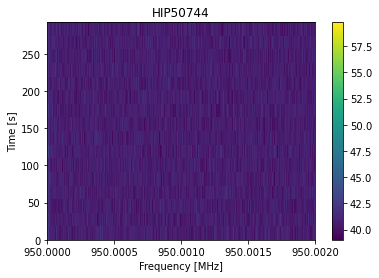

In [15]:
fb.plot_waterfall(f_start=950, f_stop=950.002)

extracting integration 0...


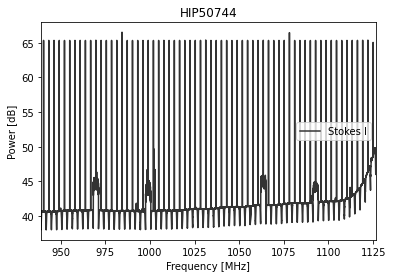

In [13]:
fb.plot_spectrum(logged=True)

In [22]:
file = '/datax/scratch/jliang/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5'
fb = bl.Waterfall(file)
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :                8421.38671875 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     source_name :                        VOYAGER-1
         src_dej :                     12:24:13.614
         src_raj :                     17:12:40.481
    telescope_id :                                6
           tsamp :               18.253611007999982
   tstart (ISOT) :          2020-07-16T22:13:56.000
    tstart (MJD) :                59046.92634259259
        za_start :                              0.0

Num ints in file :                               16
      File shape :                 (16, 1, 

In [25]:
doppler = FindDoppler(file, 
                      max_drift=4, 
                      snr=10, 
                      out_dir='/datax/scratch/jliang/')
doppler.search()


turbo_seti version 2.0.18
blimpy version 2.0.11
h5py version 2.10.0

find_doppler    INFO     {'DIMENSION_LABELS': array([b'time', b'feed_id', b'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8421.38671875, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'VOYAGER-1', 'src_dej': <Angle 12.40378167 deg>, 'src_raj': <Angle 17.21124472 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611007999982, 'tstart': 59046.92634259259, 'za_start': 0.0}
find_doppler    INFO     File: /datax/scratch/jliang/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
 drift rates (min, max): (0.000000, 4.000000)
 SNR: 10.000000

Starting ET search using /datax/scratch/jliang/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
find_doppler    INFO     Parameters: datafile=/datax/scratch/jliang/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5, max_drift=4, min_drift=0.0, snr=10, out_

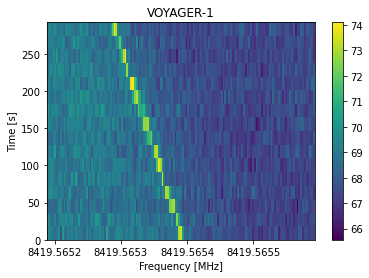

In [28]:
center_frequency = 8419.565390
fb.plot_waterfall(logged=True, f_start=center_frequency-0.0002, f_stop=center_frequency+0.0002)

In [30]:
pfb = np.fromfile('/datax/scratch/jliang/channelizer_response.f32', dtype='float32')


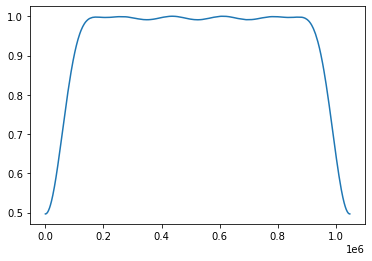

In [31]:
plt.plot(pfb)

In [32]:
spectrum = np.mean(np.squeeze(fb.data), axis=0)


In [ ]:
import os

snr = 30
l1 = 30
outdir = '/datax/scratch/jliang/'

console = f'bliss_find_hits {file} -e /datax/scratch/jliang/channelizer_response.f32 -d cuda:0 -md -4 -MD 4 -s {snr} --number-coarse 1 --distance {l1} --output ' + outdir + os.path.basename(file)[:-3] + f'_nosig_nosk_SNR_{snr}_L1_{l1}.dat'
os.system(console)

0

In [43]:
snr = 10
console = 'seticore ' + file + ' -M 4 -s ' + str(snr) + ' --output ' + outdir + os.path.basename(file)[:-2] + str(snr) + '_seticore.dat'
os.system(console)

0

In [35]:
dat = '/datax/scratch/benjb/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000_nosig_nosk_SNR_30_L1_30.dat'

df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                                'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                                'Full_number_of_hits'], skiprows=9)

df

,Top_Hit_#,Drift_Rate,SNR,Uncorrected_Frequency,Corrected_Frequency,Index,freq_start,freq_end,SEFD,SEFD_freq,Coarse_Channel_Number,Full_number_of_hits
0,1,-0.367353,124.679672,8419.520186,8419.520186,668097,8419.520239,8419.520132,0.0,0.0,0,127
1,2,-0.367353,129.151337,8419.565180,8419.565180,651993,8419.565233,8419.565126,0.0,0.0,0,124
2,3,-0.367353,1085.123535,8419.542680,8419.542680,659988,8419.542734,8419.542626,0.0,0.0,0,8


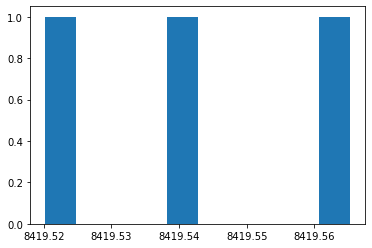

In [37]:
plt.hist(df['freq_start'].values)
plt.savefig('/datax/scratch/jliang/test.pdf')